In [24]:

import pandas as pd
import numpy as np
import sklearn.svm as svm
import pickle
import os

from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support
standard_scaler = StandardScaler()
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel as RBF
import pickle as pkl
from yellowbrick.style import set_palette
from yellowbrick.cluster import InterclusterDistance
#evaluate the solution
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from yellowbrick.style import set_palette
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

from yellowbrick.target import ClassBalance, FeatureCorrelation

from yellowbrick.classifier.confusion_matrix import *

from sklearn.preprocessing import LabelEncoder
# Feature Analysis Imports
from yellowbrick.features import JointPlotVisualizer

from yellowbrick.features import Rank1D, Rank2D
from yellowbrick.features import RadViz
from sklearn.cluster import KMeans

from yellowbrick.style import set_palette
from yellowbrick.features.manifold import Manifold
### matplotlib stuff ##

from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
styleFiles = os.listdir(mpl.get_configdir())
styleFileIdx = 2
print(styleFiles[styleFileIdx])
plt.style.use(os.path.join(mpl.get_configdir(), styleFiles[styleFileIdx]))

latexstyle3.mplstyle


In [25]:
## kernel imports 
import traceback
import warnings
from kernelmethods import KernelMatrix
import matplotlib.pyplot as plt
# plt.style.use('classic')

import numpy as np
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

##
from kernelmethods import PolyKernel, GaussianKernel, LinearKernel

poly = PolyKernel(degree=4)
rbf = GaussianKernel()
linear = LinearKernel()
# you can print/present then in many ways
print(poly)
print(rbf)
print(linear)
repr(rbf)
import seaborn as sns



polynomial(degree=4,gamma=1.0,b=1.0)
gaussian(sigma=2.0)
linear


In [26]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [15]:


'''
file to create all the various plots for each of the symbols for each of the days
'''


### functions ###
def open_pickle_file(path, pickle_file):
    file_loc = os.path.join(path, pickle_file)
    pickle_to_file = pkl.load(open(file_loc, "rb"), encoding='iso-8859-1')
    return pickle_to_file


def featureCreation4Viz(idxKey, locDict):
    ''' gives out clean features and labels for a given locDict and a idxKey
        use idxKey to inser a key from the locDict keys
        so for a particular day based on the key we get features and labels here
        returns features, labels in one data frame
    '''
    keys = list(locDict.keys())
    featuresIdxDirFileLoc = locDict[keys[idxKey]][0]
    labelsIdxDirFileLoc = locDict[keys[idxKey]][1]
    ''' read the features file'''
    featuresTupleFile = pkl.load(open(featuresIdxDirFileLoc, "rb"), encoding='latin1')
    dfFeatures = pd.concat([featuresTupleFile[0], featuresTupleFile[1], \
                            featuresTupleFile[2], featuresTupleFile[3]], axis=1, sort=False).fillna(0)
    ''' read the labels file'''
    labelsDf = pd.read_csv(labelsIdxDirFileLoc)
    ''' pop the labels out'''
    labels = labelsDf['label_PrMov__window_5__thres_arbitrary__0.1']
    '''dataframe of Features and Labels - X and Y'''
    dfXY = pd.concat([dfFeatures, labels], axis=1, sort='False').dropna()

    return dfXY


In [16]:
plt.style.use('classic')

if __name__ == '__main__':
    # locations ##
    figuresDestination ='/home/ak/Documents/Research/Papers/figures/'
    hardDriveLoc = '/media/ak/'
    dataOnlyFolder = '/media/ak/DataOnly'  # external date only drive
    symbolFeaturesDirectories  = os.path.join(dataOnlyFolder, 'SymbolFeatureDirectories')
    ExperimentCommonLocs = os.path.join(dataOnlyFolder,'ExperimentCommonLocs')

    labelsLocations = {'One': os.path.join(ExperimentCommonLocs, 'LabelsAlternateOne'),
                       'Two': os.path.join(ExperimentCommonLocs, 'LabelsAlternateTwo'),
                       'Three': os.path.join(ExperimentCommonLocs, 'LabelsAlternateThree'),
                       'Four': os.path.join(ExperimentCommonLocs, 'LabelsAlternateFour'),
                       'File':os.path.join(ExperimentCommonLocs, 'LabelsAlternateFive'),
                       'Six': os.path.join(ExperimentCommonLocs, 'LabelsAlternateSix')}

    # symbols

    symbols = sorted(os.listdir(symbolFeaturesDirectories))

    # pick a symbol


    symbolIdx = 27
        
    symbolSpecificFeaturesDirectors = os.path.join(symbolFeaturesDirectories, sorted(symbols)[symbolIdx])
    print('you chose symbol:', sorted(symbols)[symbolIdx])
    symbolFeaturesLocation = "/".join((symbolSpecificFeaturesDirectors, 'MODEL_BASED'))  # where all the HMM output is
    print('your features are here-in pickle format:',symbolFeaturesLocation)
    # and a label Idx
    labelsIdx = 'Two'
    print('you are picking Label', labelsIdx)
    LabelsFilesPath = os.path.join(labelsLocations[str(labelsIdx)], sorted(symbols)[symbolIdx])
    LabelsFiles = os.listdir(LabelsFilesPath)

    dates = os.listdir(symbolFeaturesLocation)
    
    dateIdx = 2


    for dateIdx in range(2, 32):
        dateSpecificDirectory = os.path.join(symbolFeaturesLocation, dates[dateIdx])
        dateSpecificFiles = sorted(os.listdir(dateSpecificDirectory))

        for idx in range(1, 32):

            specificFile = os.path.join(dateSpecificDirectory, dateSpecificFiles[idx])

            featuresTupleFile  = open_pickle_file(dateSpecificDirectory, dateSpecificFiles[idx])

            label_date = specificFile.split("_")[6]

            labelDateFile = os.path.join(LabelsFilesPath, str(label_date) +'.csv')

            if os.path.isfile(labelDateFile):
                df = pd.read_csv(labelDateFile)
            else:
                print('not a valid dates file')

            labelName = str(df.columns[df.columns.str.contains(pat='label')].values[0])
            labels = df[df.columns[df.columns.str.contains(pat='label')]].iloc[:, 0]

            dfFeatures = pd.concat([featuresTupleFile[0], featuresTupleFile[1], \
                                    featuresTupleFile[2], featuresTupleFile[3]], axis=1, sort=False).fillna(0)


            features= list(dfFeatures.columns.values)
            X = pd.get_dummies(dfFeatures)
            # Convert unique classes (strings) into integers

            X_array = np.asarray(X)

            poly = PolyKernel(degree=4, gamma =0.5, b =0.5)
            rbf = GaussianKernel(sigma=0.5)
            # you can print/present then in many ways
            print(poly)
            print(rbf)
            repr(rbf)
            km_poly = KernelMatrix(poly)
            km_rbf = KernelMatrix(rbf)
            km_linear = KernelMatrix(linear)

            km_rbf.attach_to(X_array)
            km_linear.attach_to(X_array)
            km_poly.attach_to(X_array)
            
            sns_kernel_poly = sns.heatmap(km_poly.full,cmap="RdYlGn",cbar=False)
            sns_kernel_poly.tick_params(left=False, bottom=False)
            
            
            title ='PolyKernel_'+str(sorted(symbols)[symbolIdx])
            fig = sns_kernel_poly.get_figure()
            
            fig.savefig('/home/ak/Documents/Research/Papers/figures/' + str(title)+'_'+str(dateIdx)+'_'+str(idx) + '.png', dpi=150)
            x= (km_poly.frob_norm).round(decimals=2)
            fig = plt.figure()
            
            sns_kernel_linear = sns.heatmap(km_linear.full,cmap="RdYlGn",cbar=False)
            sns_kernel_linear.tick_params(left=False, bottom=False)
            title ='PolyKernel_'+str(sorted(symbols)[symbolIdx])
            fig = sns_kernel_linear.get_figure()
            
            fig.savefig('/home/ak/Documents/Research/Papers/figures/' + str(title)+'_'+str(dateIdx)+'_'+str(idx) + '.png', dpi=150)
            x= (km_poly.frob_norm).round(decimals=2)
            fig = plt.figure()            
            
            
            plt.matshow(km_linear.full, cmap="RdYlGn", interpolation='none', vmin=0, vmax=1, label = ['FrobNorm: '+str(x)] )
            plt.text(3, 3, 'FrobNorm: '+str(x))

            
            plt_title = 'polyLinear_mplt'+str(sorted(symbols)[symbolIdx]+'_'+str(dateIdx)+'_'+str(idx))
            plt.savefig('/home/ak/Documents/Research/Papers/figures/' + str(plt_title) + '.png', dpi=150)
            
                


you chose symbol: RDSb.L
your features are here-in pickle format: /media/ak/DataOnly/SymbolFeatureDirectories/RDSb.L/MODEL_BASED
you are picking Label Two
polynomial(degree=4,gamma=0.5,b=0.5)
gaussian(sigma=0.5)


RuntimeError: Unable to fully compute the kernel matrix!

In [6]:
km = KernelMatrix(rbf)
km_linear = KernelMatrix(linear)
km_poly = KernelMatrix(poly)

In [7]:
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
x =np.round((km_poly.frob_norm))
print(np.round(x))

AttributeError: 'KernelMatrix' object has no attribute 'shape'

In [8]:
X_array = np.asarray(X)
km.attach_to(X_array)
km_linear.attach_to(X_array)
km_poly.attach_to(X_array)

In [9]:
X_array = np.asarray(X)

In [10]:
km_linear.full

KMNormError: Some diagnoal entries in KM are [close to] zero -  this results in infinite or Nan values during Cosine normalization of KM!

In [17]:
from kernelmethods import PolyKernel, GaussianKernel, LinearKernel

poly = PolyKernel(degree=11)
rbf = GaussianKernel(sigma=0.5)
# you can print/present then in many ways
print(poly)
print(rbf)
repr(rbf)

polynomial(degree=11,gamma=1.0,b=1.0)
gaussian(sigma=0.5)


'gaussian(sigma=0.5)'

In [18]:
km = KernelMatrix(poly)
km_rbf = KernelMatrix(rbf)
km_linear = KernelMatrix(linear)

In [19]:
km.attach_to(X_array)
km_rbf.attach_to(X_array)
km_linear.attach_to(X_array)


In [20]:
km.full

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
print('number of elements: {}, \n\tsamples: {} '.format(km.size, km.num_samples))
print('shape of KM: ', km.shape)

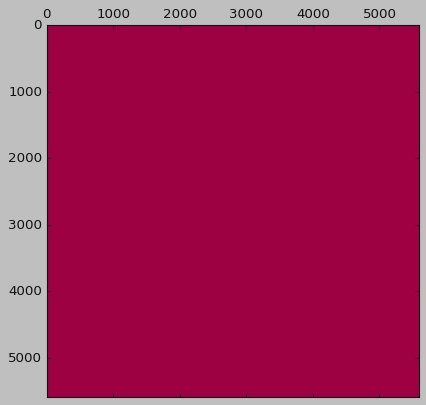

In [21]:
plt.matshow(km_rbf.full, cmap=plt.cm.Spectral_r, interpolation='none', vmin=0, vmax=1)

In [23]:
import seaborn as sns
sns.heatmap(km_poly.full,cmap="RdYlGn", xticklabels=90, yticklabels=90)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
plt.matshow(km.full)